<a href="https://colab.research.google.com/github/souvikg544/Background_Change_SegmentAnything/blob/main/Background_Change_SAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ev1z0tmd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ev1z0tmd
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36610 sha256=3c8a51d736169c1ac0c4e535efbdf6f54ad1f3790d9ab67cc54e85e14bb411c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-1az3ntf3/wheels/d5/11/03/7aca746a2c0e09f279b10436ced7175926bc38f650b736a648
Successfully built segment-anything


In [2]:
pip install opencv-python pycocotools matplotlib onnxruntime onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.9 MB/s eta 0:00:00


In [3]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

--2023-04-16 16:46:59--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.249.85.90, 13.249.85.39, 13.249.85.89, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.249.85.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   156MB/s    in 14s     

2023-04-16 16:47:13 (171 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [4]:
import cv2
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry
from segment_anything import SamAutomaticMaskGenerator
from google.colab.patches import cv2_imshow
import torch
import numpy as np

In [5]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [6]:
DEVICE

device(type='cuda', index=0)

In [28]:
IMAGE_PATH="/content/girl3.jpg"
BACKGROUND_PATH="/content/beautiful background.jpg"

In [30]:
img=cv2.imread(IMAGE_PATH)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
background = cv2.imread(BACKGROUND_PATH)
background=cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
# Resize the new background image to match the dimensions of the original image if necessary
background = cv2.resize(background, (img.shape[1], img.shape[0]))

In [9]:
sam = sam_model_registry["vit_h"](checkpoint="/content/sam_vit_h_4b8939.pth")

In [10]:
sam.to(device=DEVICE)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [23]:
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(img_rgb)

In [12]:
result

[{'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 65763,
  'bbox': [166, 57, 183, 611],
  'predicted_iou': 1.0165636539459229,
  'point_coords': [[248.0, 97.3125]],
  'stability_score': 0.9780271053314209,
  'crop_box': [0, 0, 512, 692]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 27046,
  'bbox': [192, 310, 131

In [17]:
type(result[0]['segmentation'][0][0])

numpy.bool_

In [18]:
np.unique(result[0]['segmentation'])

array([False,  True])

In [13]:
for i in range(0,len(result)):
  result[i]['segmentation']=result[i]['segmentation'].astype(np.uint8)
  

Area -  65763


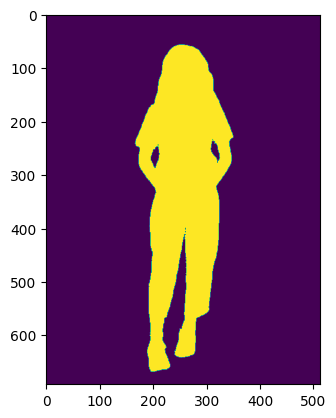

Area -  27046


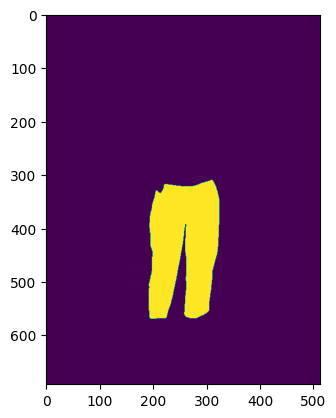

Area -  147844


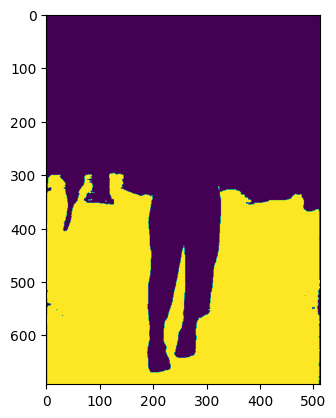

Area -  7509


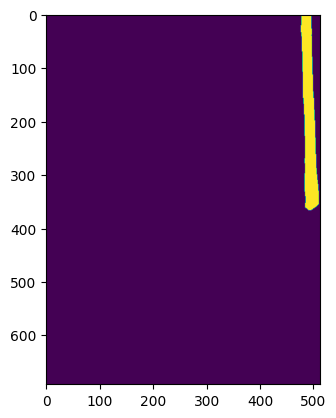

Area -  17521


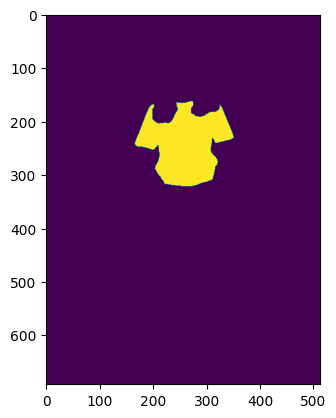

Area -  3040


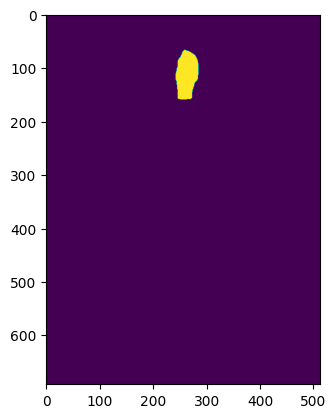

Area -  9060


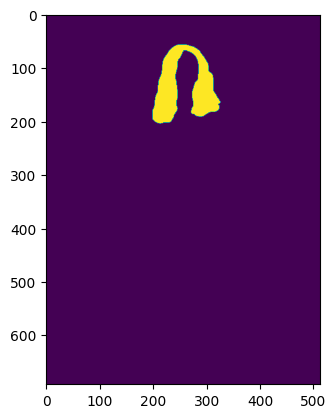

Area -  17515


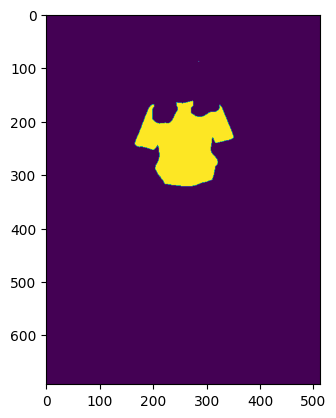

Area -  1817


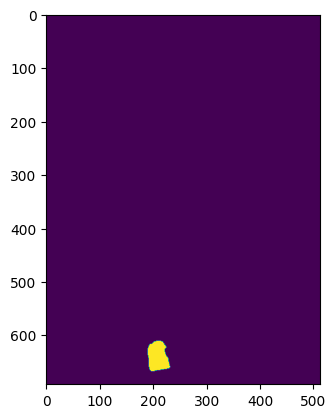

Area -  1521


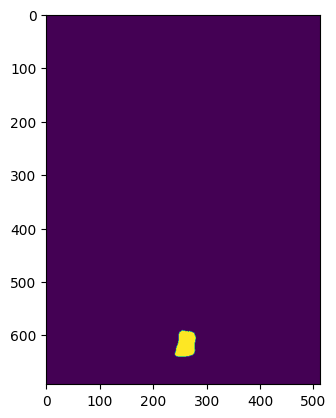

Area -  4994


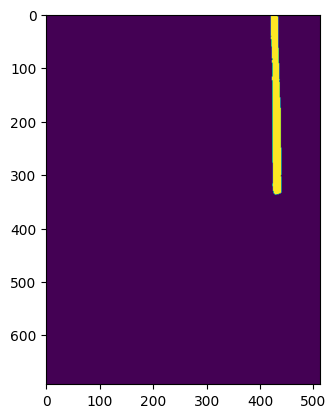

Area -  2411


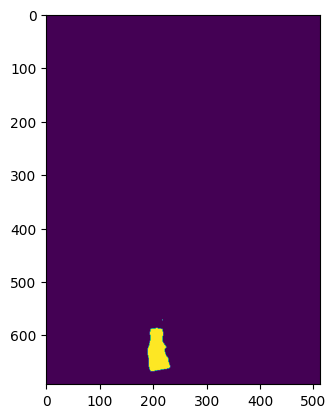

Area -  5733


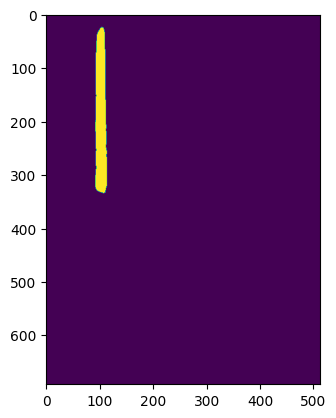

Area -  26986


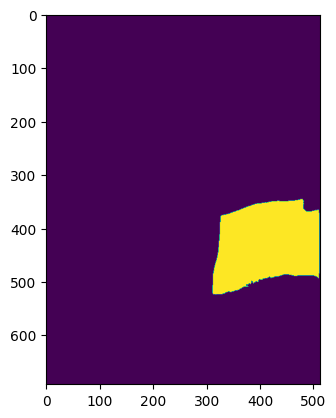

Area -  7016


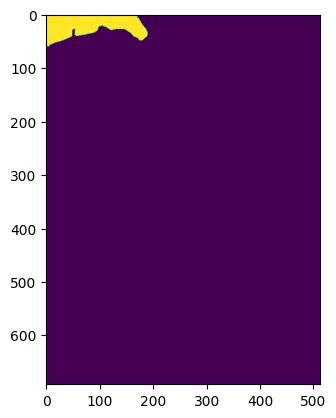

Area -  670


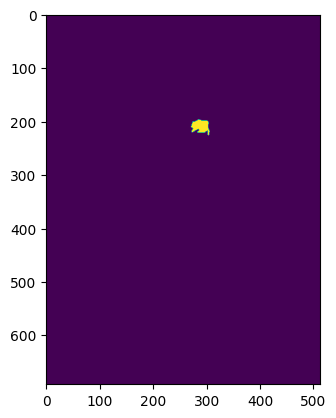

Area -  1708


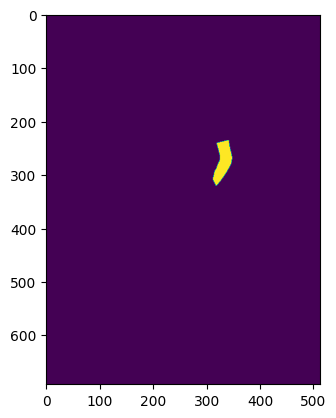

Area -  585


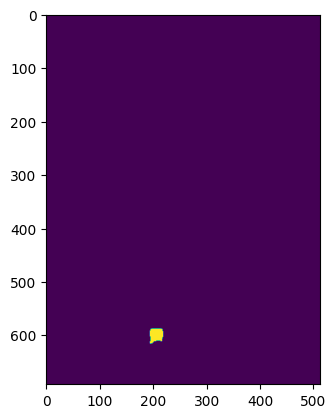

Area -  1008


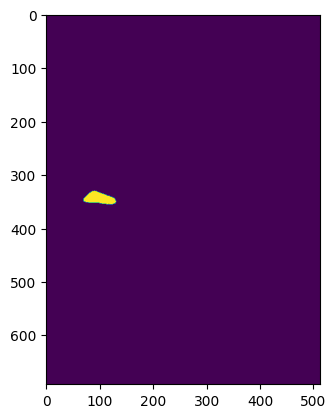

Area -  6223


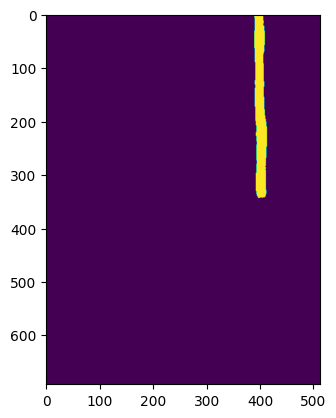

Area -  4415


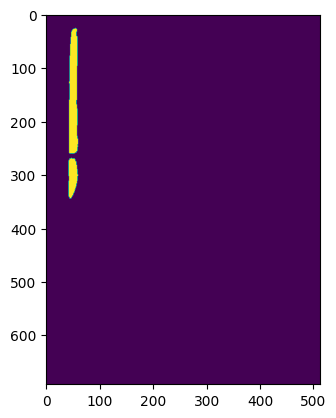

Area -  5931


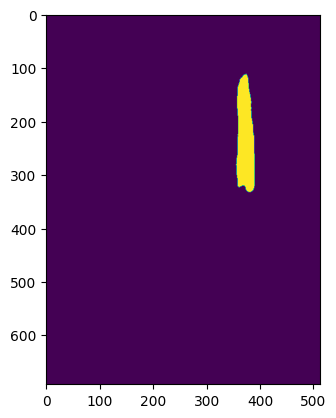

Area -  123


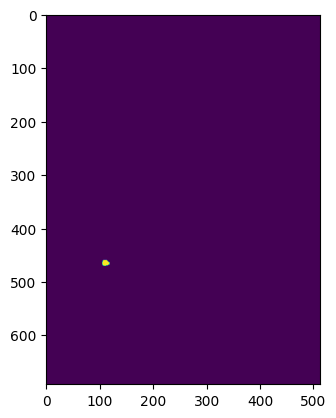

Area -  963


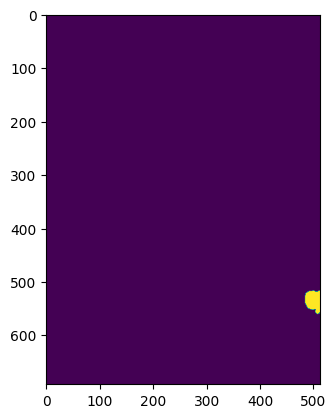

Area -  3260


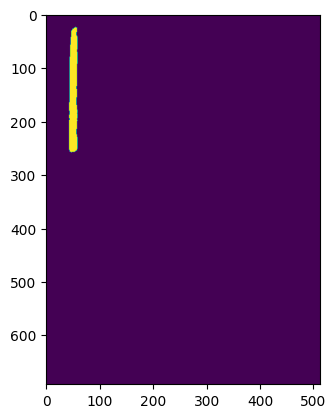

Area -  762


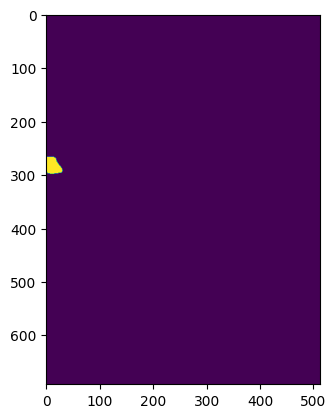

Area -  761


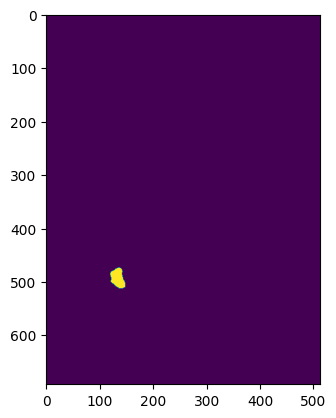

Area -  270


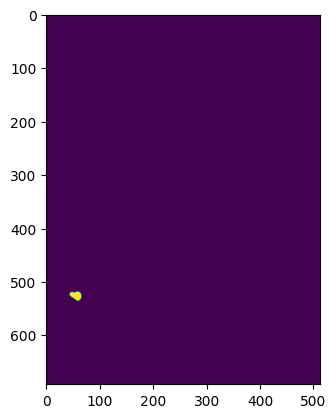

Area -  75


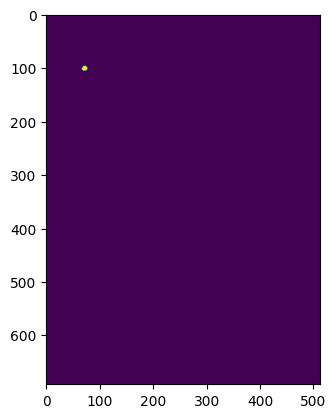

Area -  631


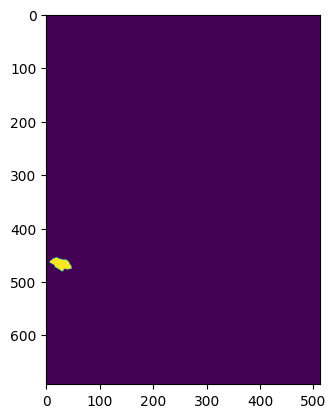

Area -  348


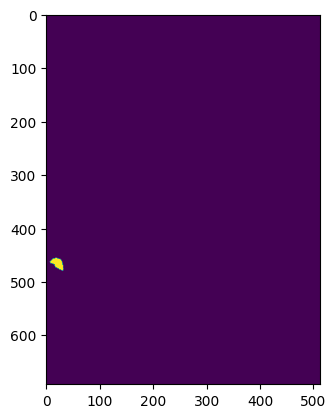

Area -  184


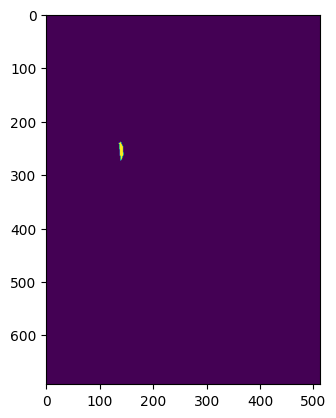

Area -  277


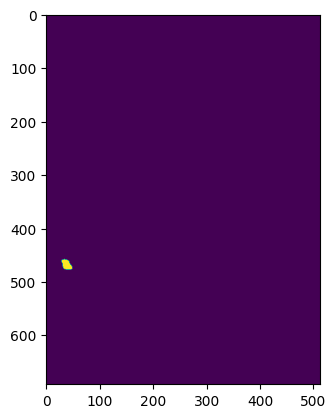

Area -  193


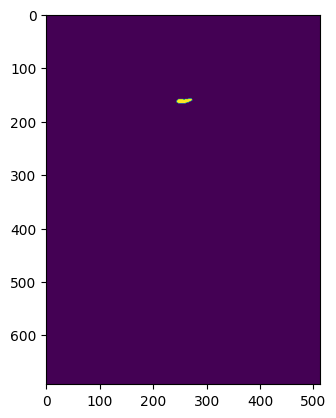

Area -  395


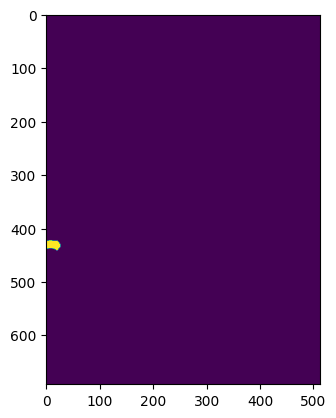

Area -  450


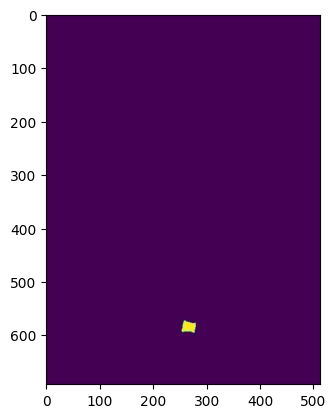

Area -  437


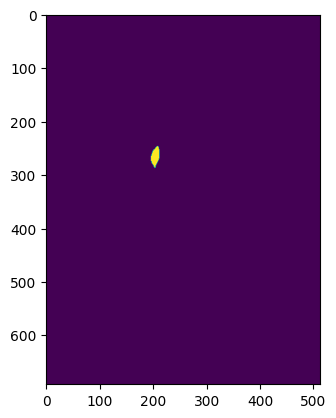

Area -  367


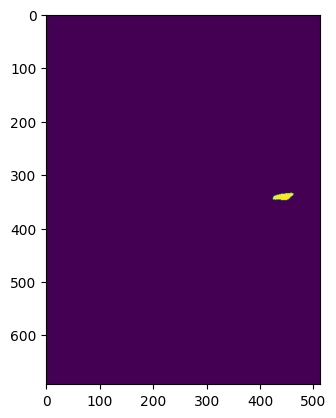

Area -  3158


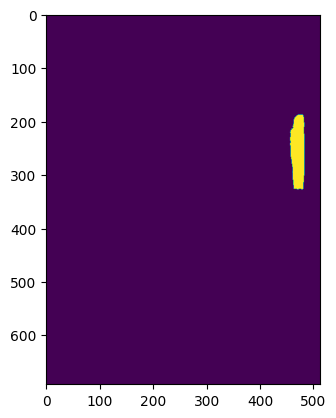

Area -  1591


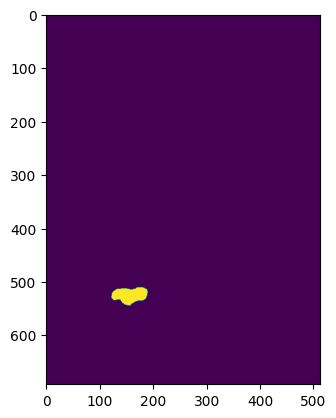

Area -  836


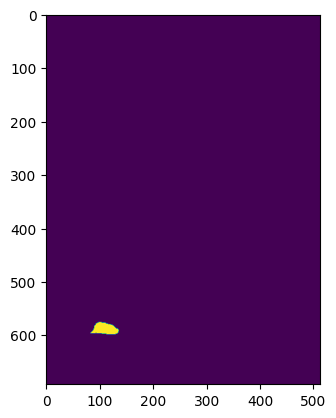

Area -  1168


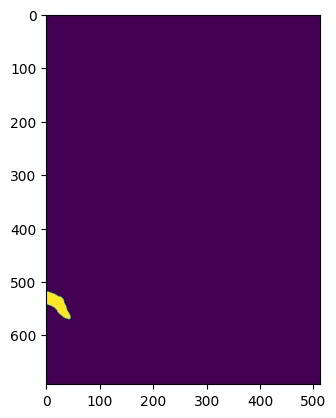

Area -  828


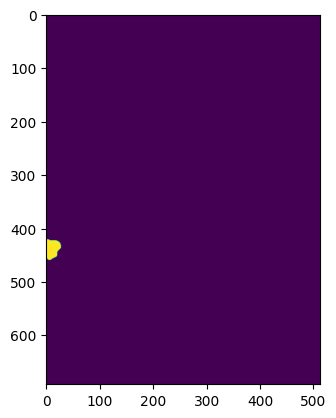

Area -  668


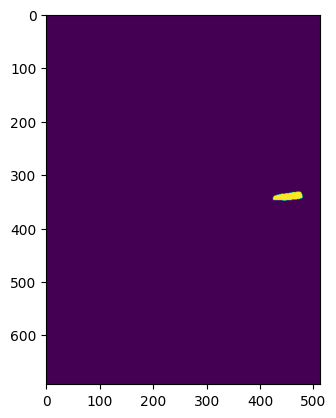

Area -  924


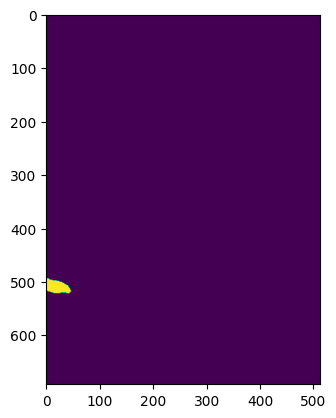

Area -  2196


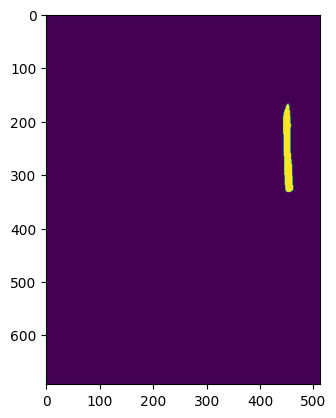

Area -  1800


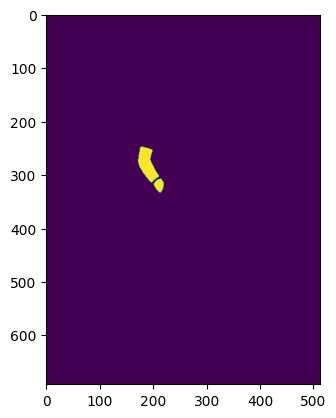

Area -  903


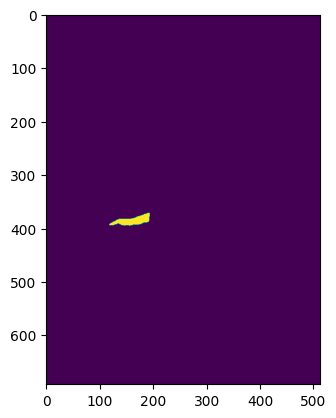

Area -  237


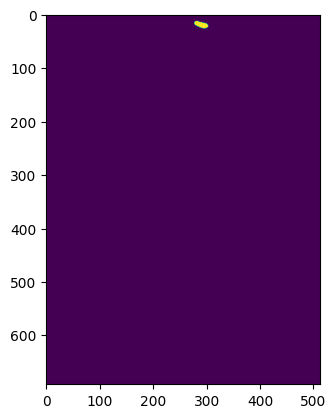

Area -  575


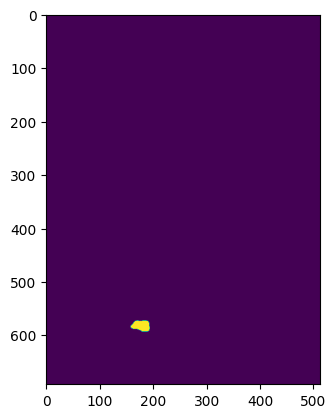

Area -  2573


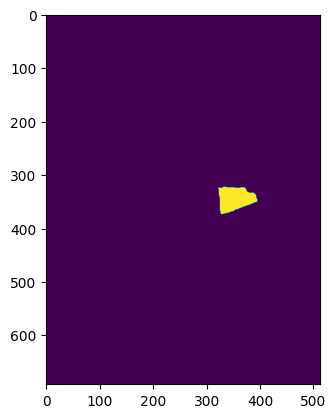

Area -  113


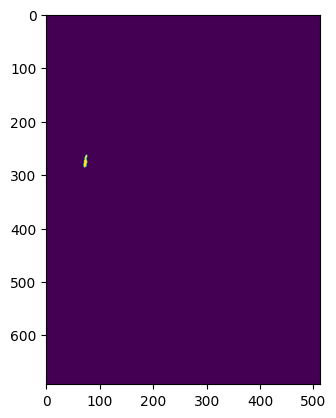

Area -  291


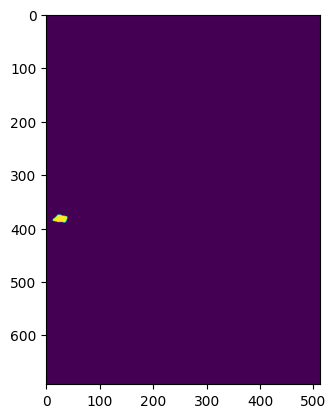

Area -  231


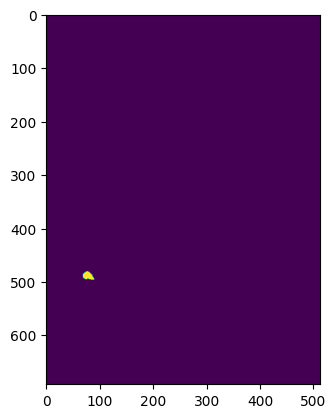

Area -  75


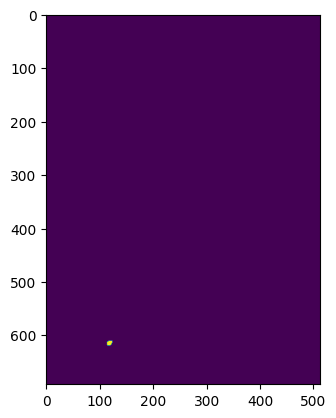

Area -  252


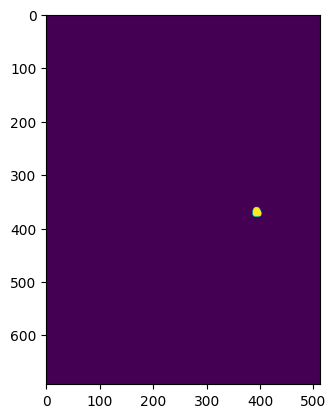

Area -  2421


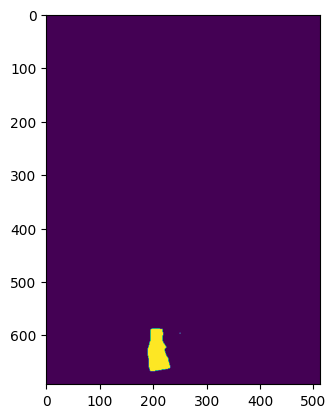

Area -  246


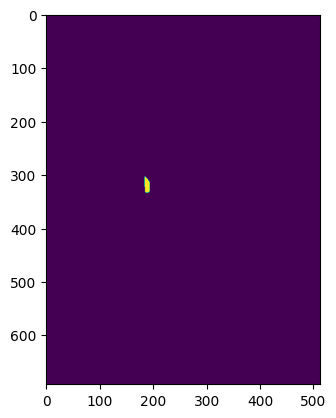

Area -  931


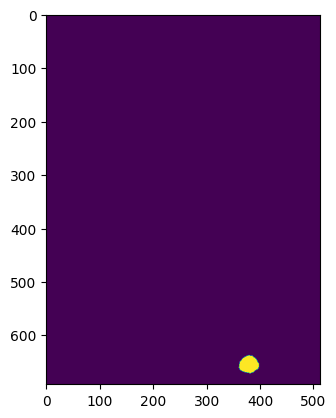

Area -  305


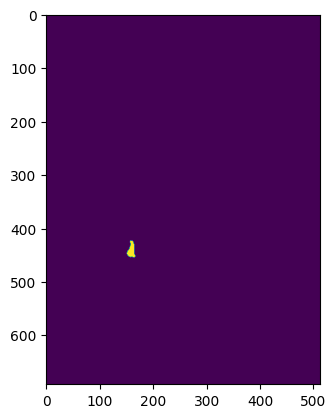

Area -  188


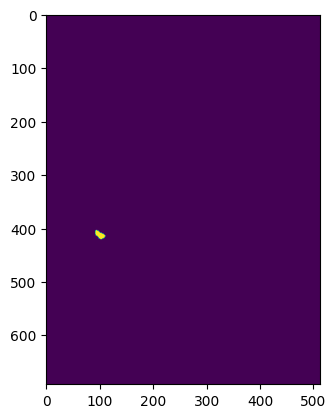

Area -  656


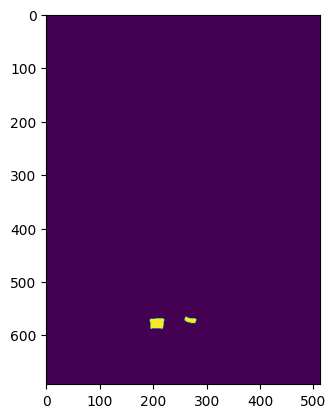

Area -  1527


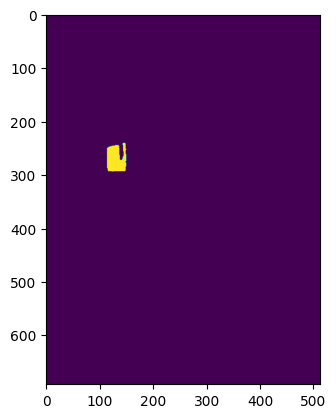

Area -  105


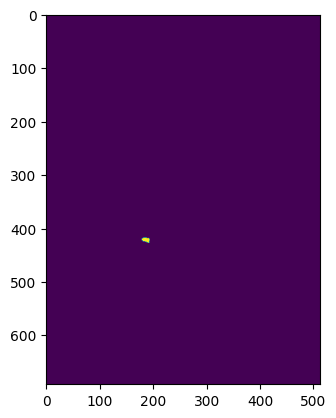

Area -  283


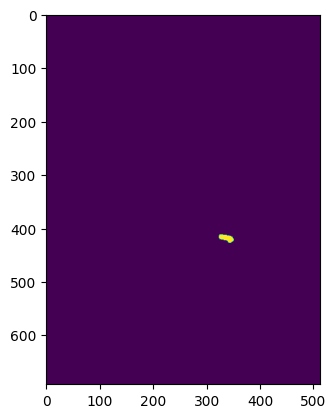

Area -  31915


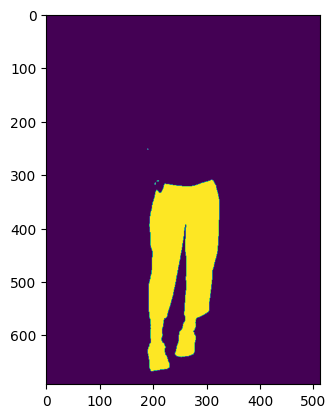

Area -  197


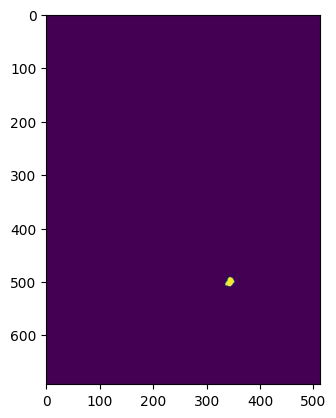

In [14]:
for i in range(0,len(result)):
  img_test=result[i]['segmentation']
  print("Area - ",result[i]['area'])
  plt.imshow(img_test)
  plt.show()

In [31]:
mask=result[0]['segmentation']

In [ ]:
mask

In [32]:
background[mask] = img_rgb[mask]

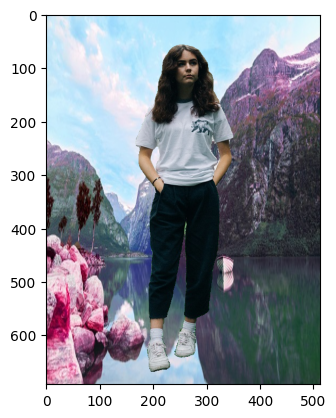

In [33]:
plt.imshow(background)

In [35]:
res=cv2.cvtColor(background, cv2.COLOR_RGB2BGR)

In [36]:
cv2.imwrite("output_image.png",res)

True